<a href="https://colab.research.google.com/github/Felipech09/Atividade-de-sala/blob/main/oficina_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Redes Neurais Artificiais
## I. O Neurônio Artificial e o Perceptron

### 1.1 Introdução Teórica

O ponto de partida das Redes Neurais é o Neurônio Artificial, inspirado na célula nervosa biológica. Ele realiza duas operações principais:

1. Soma Ponderada: Multiplica cada entrada ($x_i$) por seu respectivo peso ($w_i$) e soma um bias ($b$).
$$z=\left(\sum_{i=1}^{n} x_i w_i \right)+b$$

2. Ativação: Aplica uma função de ativação ($f$) ao resultado ($z$) para produzir a saída:
$$r=f(z)$$

O Perceptron (1957) é o modelo mais simples, usando uma função de ativação Degrau para classificação binária. Ele só consegue resolver problemas linearmente separáveis.

### 1.2 Implementação do Perceptron (Classificação Linear)

Vamos simular a porta lógica `AND` para demonstrar o Perceptron.

In [22]:
# Definindo a porta lógica AND
data = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'Y': [0, 0, 0, 1]
}
df_and = pd.DataFrame(data)
X = df_and[['X1', 'X2']].values
Y = df_and['Y'].values

In [23]:
import numpy as np

# Função de Ativação Degrau
def step_function(z):
    return 1 if z >= 0 else 0

# Treinamento do Perceptron
def train_perceptron(X, Y, epochs=10, learning_rate=0.1):
    # Inicializa pesos (w1, w2) e bias (b) aleatoriamente (ou zeros)
    weights = np.zeros(X.shape[1])  # 2 pesos (w1, w2)
    bias = 0.0

    for epoch in range(epochs):
        total_error = 0
        for x, y_true in zip(X, Y):
            # 1. Soma Ponderada
            z = np.dot(x, weights) + bias

            # 2. Ativação
            y_pred = step_function(z)

            # 3. Cálculo do Erro e Ajuste
            error = y_true - y_pred
            total_error += abs(error)

            # 4. Atualização dos Pesos e Bias (Regra do Perceptron)
            weights += learning_rate * error * x
            bias += learning_rate * error

        print(f"Época {epoch+1}: Erro Total = {total_error}")
        if total_error == 0:
            print("Convergência atingida!")
            break

    return weights, bias


In [24]:
# Execução do treinamento para AND
print("--- Treinando Perceptron (Porta AND) ---")
final_weights, final_bias = train_perceptron(X, Y, epochs=10, learning_rate=0.1)

print(f"\nPesos Finais (w1, w2): {final_weights}")
print(f"Bias Final (b): {final_bias}")

# Teste
def predict_perceptron(x, weights, bias):
    z = np.dot(x, weights) + bias
    return step_function(z)

print("\n--- Teste de Previsão ---")
for x, y_true in zip(X, Y):
    y_pred = predict_perceptron(x, final_weights, final_bias)
    print(f"Entrada: {x}, Verdadeiro: {y_true}, Previsto: {y_pred}")

--- Treinando Perceptron (Porta AND) ---
Época 1: Erro Total = 2
Época 2: Erro Total = 3
Época 3: Erro Total = 3
Época 4: Erro Total = 0
Convergência atingida!

Pesos Finais (w1, w2): [0.2 0.1]
Bias Final (b): -0.20000000000000004

--- Teste de Previsão ---
Entrada: [0 0], Verdadeiro: 0, Previsto: 0
Entrada: [0 1], Verdadeiro: 0, Previsto: 0
Entrada: [1 0], Verdadeiro: 0, Previsto: 0
Entrada: [1 1], Verdadeiro: 1, Previsto: 1


# II. MLP

## 2.1 Teoria da MLP

O Perceptron falha no problema `XOR` porque ele não é linearmente separável. A solução é o MLP (Multi-Layer Perceptron), que adiciona Camadas Ocultas.

Para que camadas ocultas sejam eficazes, a função de ativação deve ser Não-Linear e, mais importante para o próximo passo, Diferenciável.

1. **Função Sigmoide**: Usada historicamente.
$$f(z)=\frac{1}{1 + e^{−z}}$$

2. **Função ReLU** (Rectified Linear Unit): A mais comum atualmente, por ser simples e eficiente.
$$f(z)=\max(0,z)$$

## 2.2 Preparando o Problema XOR

In [25]:
# Definindo o problema XOR
xor_data = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'Y': [0, 1, 1, 0]
}
df_xor = pd.DataFrame(xor_data)
X_xor = df_xor[['X1', 'X2']].values
Y_xor = df_xor['Y'].values.reshape(-1, 1)

In [26]:
# Funções de Ativação e Suas Derivadas
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)


#### Estrutura da MLP:
* Camada de Entrada: 2 neurônios (X1, X2)
* Camada Oculta: 3 neurônios (escolha arbitrária)
* Camada de Saída: 1 neurônio (Y)

# III. Backpropagation

## 3.1 Teoria do Treinamento

O **Backpropagation** (**Retropropagação**) é o algoritmo para treinar MLPs. Ele usa a **Descida do Gradiente** para ajustar os pesos de trás para frente, minimizando a Função de Custo (usaremos o **Erro Quadrático Médio** `MSE`, $J$).

A atualização de um peso ($w$) é dada por:
$$w_{i}=w_{i-1} - \alpha \frac{\partial J}{\partial w}$$

O cálculo do gradiente ($\frac{\partial J}{\partial w}$) é feito pela **Regra da Cadeia**, propagando o erro da camada de saída de volta para as camadas ocultas.

## 3.2 Implementação da MLP com Backpropagation

In [27]:
np.random.seed(42)

# Hiperparâmetros
epochs = 10000
learning_rate = 0.5
input_size = 2
hidden_size = 3
output_size = 1

# 1. Inicialização dos Pesos e Bias
# Camada de Entrada -> Oculta (W1 e b1)
W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.zeros((1, hidden_size))

# Camada Oculta -> Saída (W2 e b2)
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.zeros((1, output_size))

# 2. Loop de Treinamento
for epoch in range(epochs):

    # --- A. FORWARD PASS (Propagação Direta) ---
    # Camada Oculta
    Z1 = np.dot(X_xor, W1) + b1
    R1 = sigmoid(Z1)

    # Camada de Saída
    Z2 = np.dot(R1, W2) + b2
    R2 = sigmoid(Z2)

    # --- B. BACKWARD PASS (Retropropagação do Erro) ---
    # 1. Erro na Camada de Saída
    # dJ/dA2 (Derivada do Custo em relação à Saída)
    E_output = Y_xor - R2

    # dJ/dZ2: Gradiente de Z2
    dZ2 = E_output * sigmoid_derivative(R2)

    # 2. Erro na Camada Oculta
    E_hidden = np.dot(dZ2, W2.T)

    # dJ/dZ1: Gradiente de Z1
    dZ1 = E_hidden * sigmoid_derivative(R1)

    # --- C. ATUALIZAÇÃO DOS PESOS (Gradient Descent) ---
    # Gradientes
    dW2 = np.dot(R1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dW1 = np.dot(X_xor.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Ajuste
    W2 += learning_rate * dW2
    b2 += learning_rate * db2

    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Exibir Erro
    if epoch % 1000 == 0:
        loss = np.mean(np.square(E_output)) / 2
        print(f"Época {epoch}: Custo (Loss) = {loss:.4f}")

print("\n--- Treinamento Concluído ---")

Época 0: Custo (Loss) = 0.1489
Época 1000: Custo (Loss) = 0.0096
Época 2000: Custo (Loss) = 0.0014
Época 3000: Custo (Loss) = 0.0007
Época 4000: Custo (Loss) = 0.0004
Época 5000: Custo (Loss) = 0.0003
Época 6000: Custo (Loss) = 0.0003
Época 7000: Custo (Loss) = 0.0002
Época 8000: Custo (Loss) = 0.0002
Época 9000: Custo (Loss) = 0.0002

--- Treinamento Concluído ---


## 3.3 Teste e Avaliação

In [28]:
# Função de Previsão Final
def predict_mlp(X, W1, b1, W2, b2):
    # Forward Pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    # Converte para binário (0 ou 1)
    return (A2 > 0.5).astype(int)

# Previsão
Y_pred = predict_mlp(X_xor, W1, b1, W2, b2)

print("--- Resultado Final (Problema XOR) ---")
print("Entrada (X1, X2) | Verdadeiro (Y) | Previsto (Y_pred)")
print("-----------------|----------------|----------------")
for i in range(len(X_xor)):
    print(f"({X_xor[i][0]}, {X_xor[i][1]})      | {Y_xor[i][0]}              | {Y_pred[i][0]}")

# Acurácia
accuracy = np.mean(Y_pred == Y_xor)
print(f"\nAcurácia: {accuracy * 100:.2f}%")

--- Resultado Final (Problema XOR) ---
Entrada (X1, X2) | Verdadeiro (Y) | Previsto (Y_pred)
-----------------|----------------|----------------
(0, 0)      | 0              | 0
(0, 1)      | 1              | 1
(1, 0)      | 1              | 1
(1, 1)      | 0              | 0

Acurácia: 100.00%


# Resolva

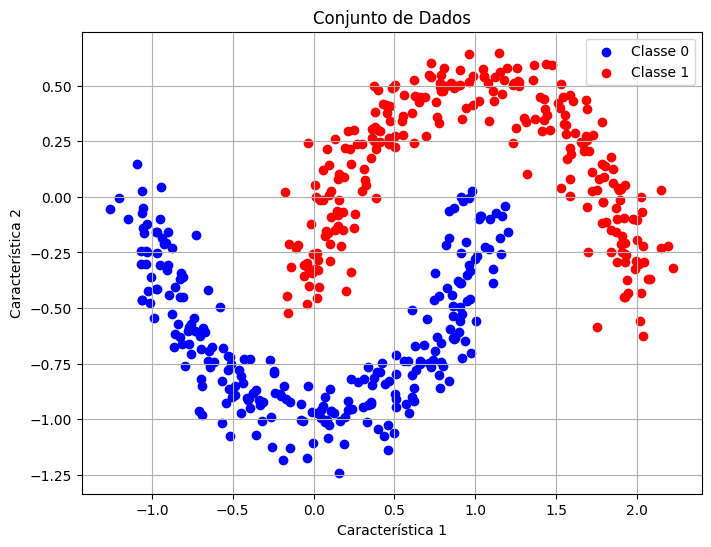

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def gerar_dados(n_amostras=1000, ruido=0.1):

    raio1 = 1
    teta1 = np.linspace(-np.pi, 0, n_amostras // 2)
    x1 = raio1 * np.cos(teta1) + np.random.normal(0, ruido, n_amostras // 2)
    y1 = raio1 * np.sin(teta1) + np.random.normal(0, ruido, n_amostras // 2)

    raio2 = 1
    teta2 = np.linspace(0, np.pi, n_amostras // 2)
    x2 = raio2 * np.cos(teta2) + 1 + np.random.normal(0, ruido, n_amostras // 2)
    y2 = raio2 * np.sin(teta2) - 0.5 + np.random.normal(0, ruido, n_amostras // 2)

    X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
    y = np.hstack((np.zeros(n_amostras // 2), np.ones(n_amostras // 2)))

    return X, y

X, y = gerar_dados(n_amostras=500, ruido=0.1)

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Classe 0')

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Classe 1')

plt.title('Conjunto de Dados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()